# Group Members:
- Ebrar Pınar Kuz
- Zümral Yılmaz
- Musab Kılıç

our drive url: https://drive.google.com/drive/folders/1sGIxNJyuZ6O7imWj0zRzlE2Oivr7cj2S?usp=drive_link

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

-PART 1-

1. Dataset Loading
* The dataset is loaded from our drive link.

2. Data Cleaning 
* The dimensions (shape) of the dataset are displayed.
* Column types and non-null counts are checked using .info().
* Detected missing values (There is no missing value).
* Detected outliers with iqr and count it, visualized with boxplot then removed the outliers
* Make and Model columns are concatenated into a single Vehicle column to provide a more descriptive feature. Original Make and Model columns are dropped.
* Column names are converted to lowercase, and spaces are replaced with underscores to ensure consistency and avoid errors.
* Each categorical column is encoded into numerical values

3. Normalization of Numerical Columns
* Numerical columns are scaled to a [0, 1] range using Min-Max Scaling for consistent value ranges across features.
* Prepeared for some special modals 


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

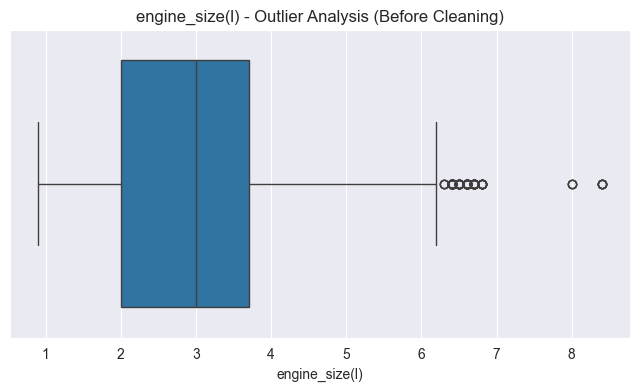

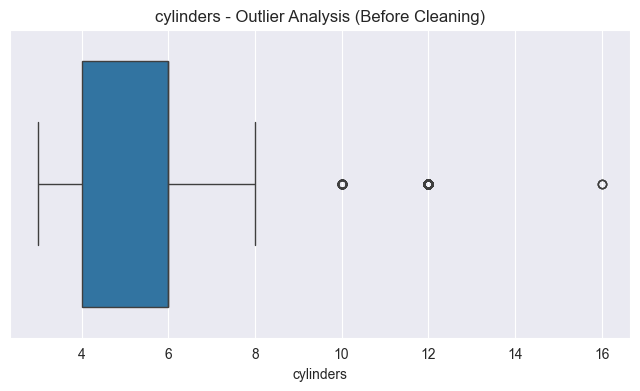

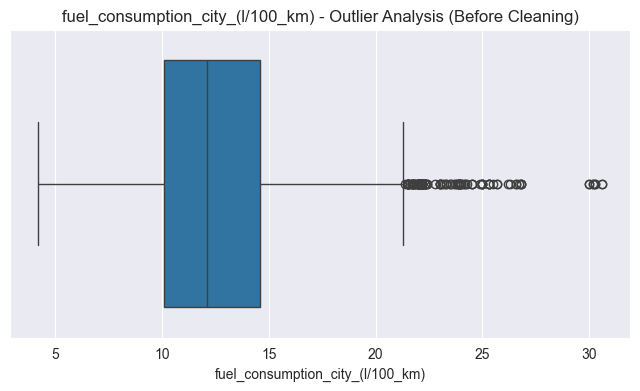

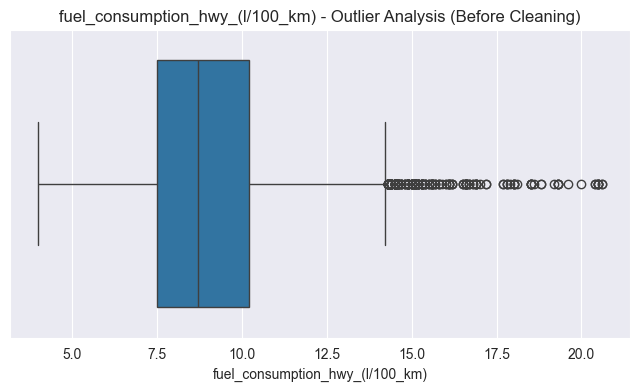

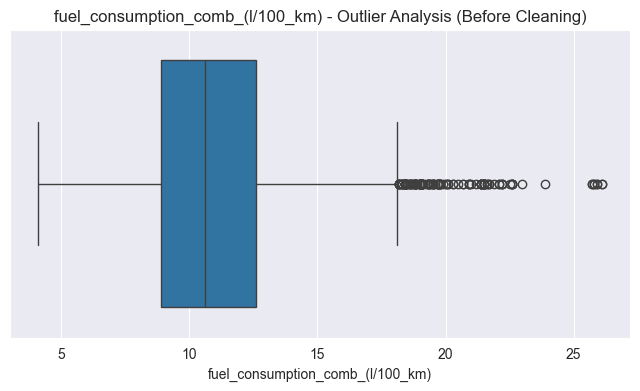

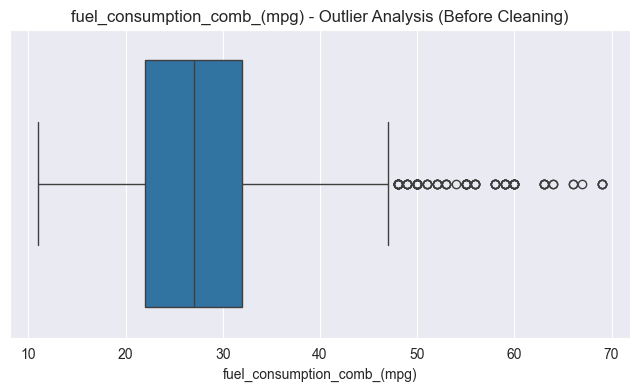

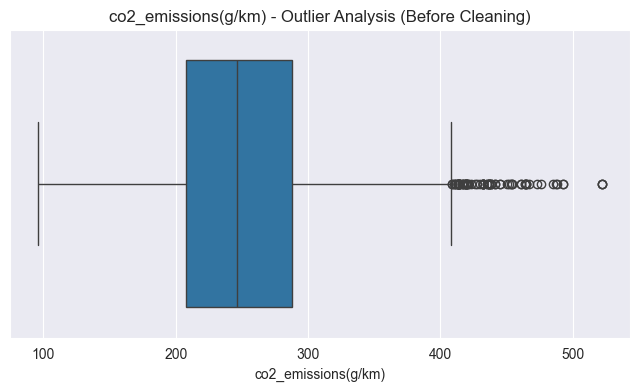

Number of outliers in engine_size(l): 137
Number of outliers in cylinders: 196
Number of outliers in fuel_consumption_city_(l/100_km): 132
Number of outliers in fuel_consumption_hwy_(l/100_km): 208
Number of outliers in fuel_consumption_comb_(l/100_km): 142
Number of outliers in fuel_consumption_comb_(mpg): 114
Number of outliers in co2_emissions(g/km): 80


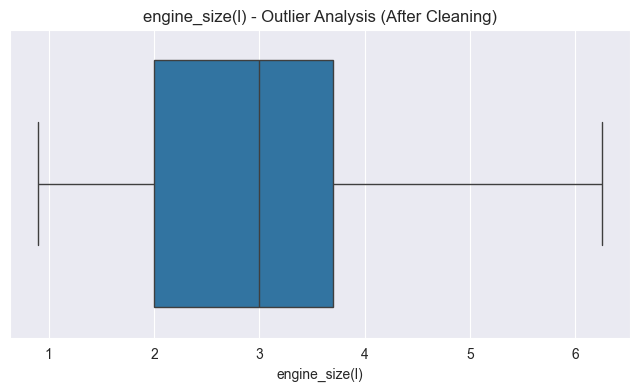

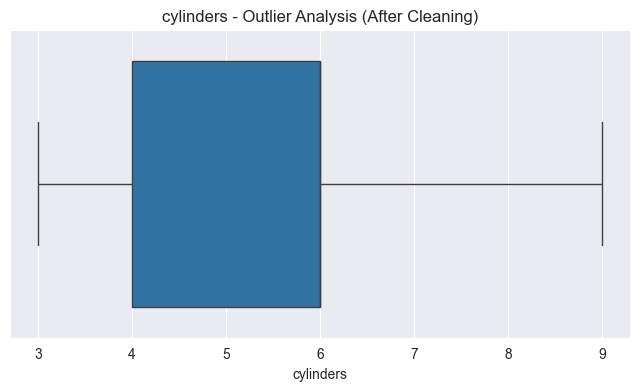

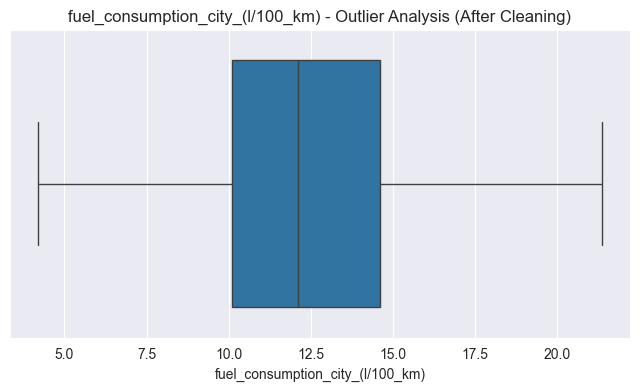

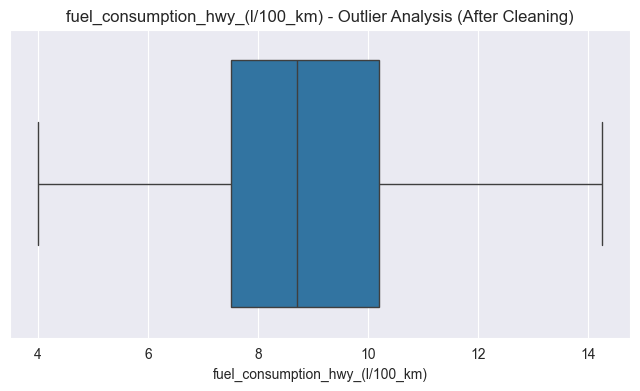

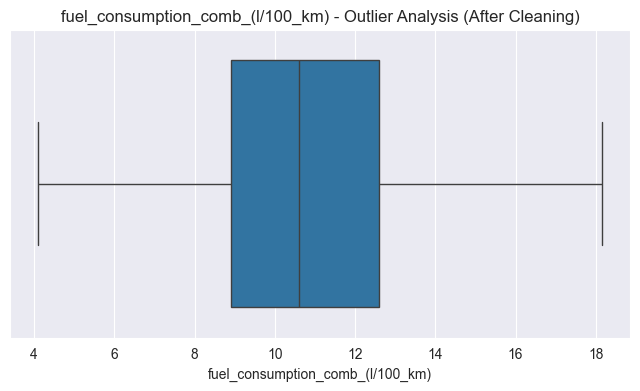

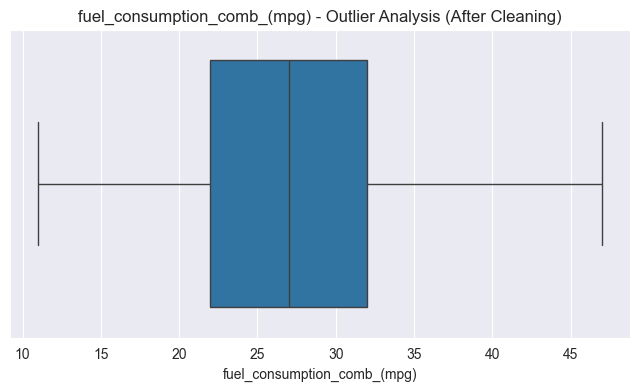

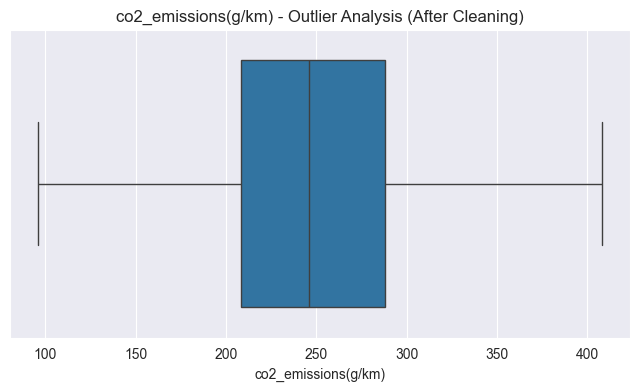


Normalized dataset:
  vehicle_class  engine_size(l)  cylinders transmission fuel_type  \
0       COMPACT        0.205607   0.166667          AS5         Z   
1       COMPACT        0.280374   0.166667           M6         Z   
2       COMPACT        0.112150   0.166667          AV7         Z   
3   SUV - SMALL        0.485981   0.500000          AS6         Z   
4   SUV - SMALL        0.485981   0.500000          AS6         Z   

   fuel_consumption_city_(l/100_km)  fuel_consumption_hwy_(l/100_km)  \
0                          0.332362                         0.263415   
1                          0.408163                         0.360976   
2                          0.104956                         0.175610   
3                          0.495627                         0.497561   
4                          0.460641                         0.458537   

   fuel_consumption_comb_(l/100_km)  fuel_consumption_comb_(mpg)  \
0                          0.313167                     0.61111

In [2]:
# Load the dataset 
driveurl = 'https://drive.google.com/uc?id=1xU0gXkqLZpldj49I6Xj-hTjRb5hnITPB'
data = pd.read_csv(driveurl)

# Display the first five rows
print(data.head())

# General information about the dataset
print("Dataset dimensions:", data.shape)
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)

# Combine 'Make' and 'Model' columns into a single 'Vehicle' column and drop the originals
data['Vehicle'] = data['Make'] + ' ' + data['Model']
data.drop(columns=['Make', 'Model'], inplace=True)


# Convert all column names to lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')





# Outlier analysis (before cleaning) for numerical columns
numeric_columns = ['engine_size(l)', 'cylinders', 'fuel_consumption_city_(l/100_km)',
                   'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)',
                   'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)']

categorical_columns = ['vehicle_class', 'transmission', 'fuel_type']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"{col} - Outlier Analysis (Before Cleaning)")
    plt.show()

# Handle outliers by filtering out extreme values
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")
    
    # Remove outliers from the dataset
    #data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    
    #Instead of deleting, change with limits
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))
    # Instead of deleting, change with median
    #median = data[col].median()
    #data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])

    # Instead of deleting, change with mean
    #mean = data[col].mean()
    #data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), mean, data[col])
    
# Outlier analysis (after cleaning)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"{col} - Outlier Analysis (After Cleaning)")
    plt.show()

# Process categorical variables
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Encode fuel type as numerical values
data['fuel_type_encoded'] = data['fuel_type'].cat.codes

# Encode vehicle class as numerical values
data['vehicle_class_encoded'] = data['vehicle_class'].cat.codes

# Encode transmission type as numerical values
data['transmission_encoded'] = data['transmission'].cat.codes

# Normalize numerical columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Summary of the normalized dataset
print("\nNormalized dataset:")
print(data.head())


-PART 2- 

1. Data Exploration
* Categorical Variable Visualization: Displays bar plots for the frequency distribution of vehicle_class, transmission, and fuel_type.
* Correlation Analysis: Uses a heatmap to visualize correlations between numerical variables.
* Numerical Feature Distribution: Histograms reveal the distribution of key numerical columns.

2. Clustering
* Elbow Method,   Determines the optimal number of clusters for the dataset. Although the graph showed 3 as the optimal number of clusters, we used **2 clusters** to classify vehicles as **harmful** or **not harmful** to the environment.
* Clusters the dataset into two groups based on numerical features.
*Adds cluster labels to the dataset (`cluster_kmeans`).
  - **Cluster 0:** Represents vehicles with lower emissions and fuel consumption (not harmful).  
  - **Cluster 1:** Represents vehicles with higher emissions and fuel consumption (harmful).* Visualizes the clustering results using scatter plots for selected features.

3. Dimensionality Reduction with PCA
* Performs clustering on the PCA-transformed dataset.
* Visualizes the PCA-based clustering results.

4. Evaluation
* Calculates the mean of numerical features within each cluster to interpret group characteristics.
* Summarizes categorical variables (e.g., unique values, mode).
* Provides mean values of numerical features for each cluster.
 

       engine_size(l)    cylinders  fuel_consumption_city_(l/100_km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         0.421092     0.424193                          0.485023   
std          0.249581     0.271574                          0.196903   
min          0.000000     0.000000                          0.000000   
25%          0.205607     0.166667                          0.344023   
50%          0.392523     0.500000                          0.460641   
75%          0.523364     0.500000                          0.606414   
max          1.000000     1.000000                          1.000000   

       fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
count                      7385.000000                       7385.000000   
mean                          0.487512                          0.486645   
std                           0.203030                          0.197221   
min                           0.000000         

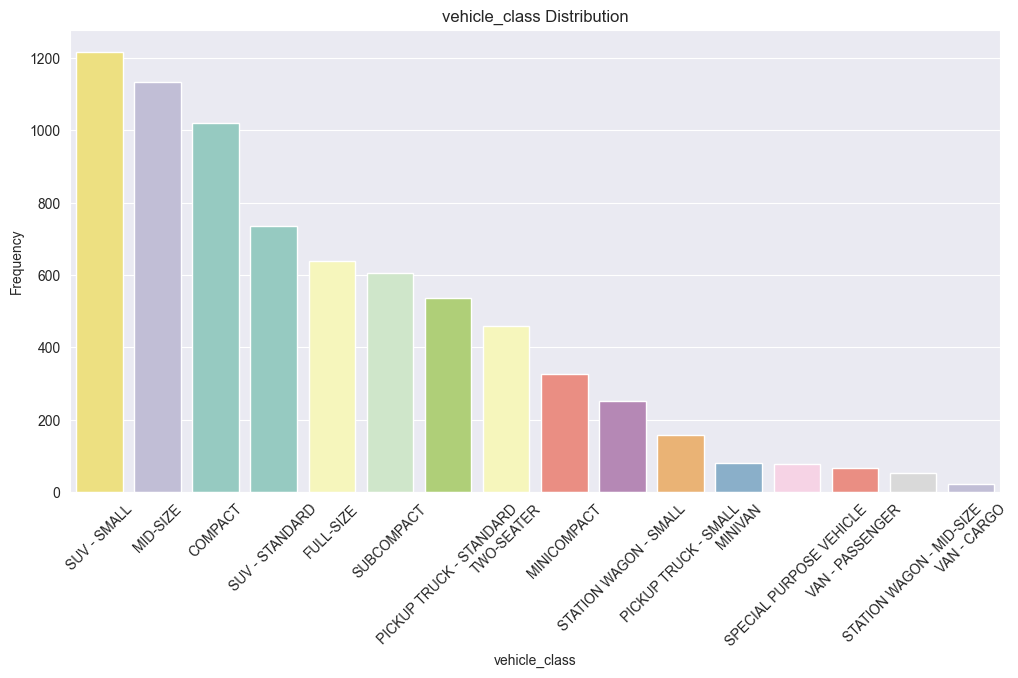

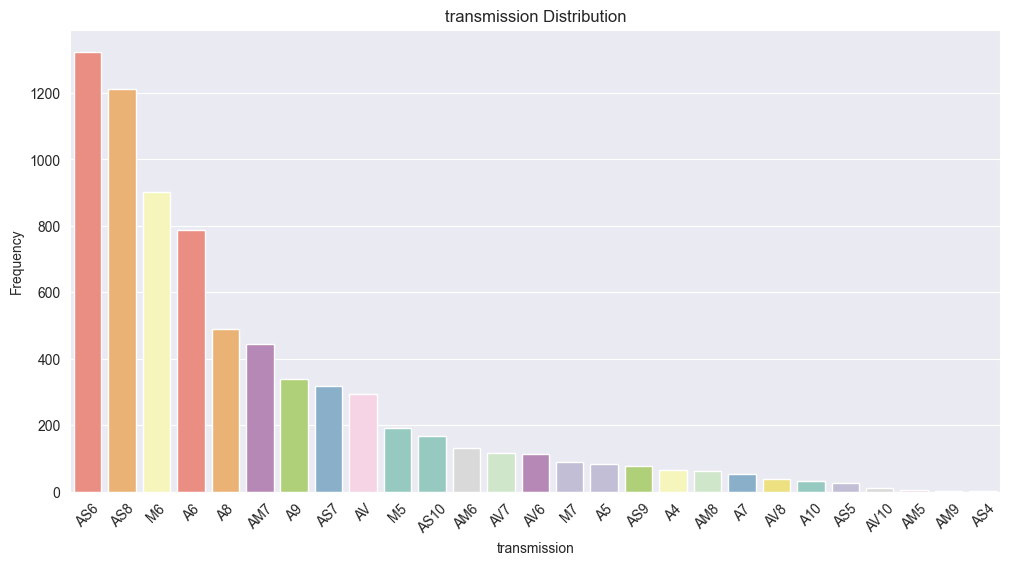

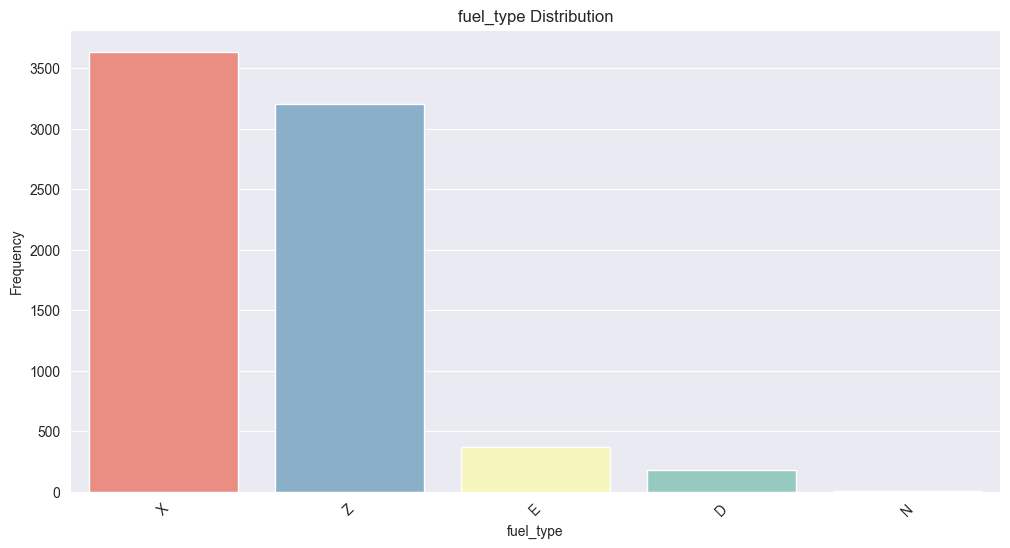

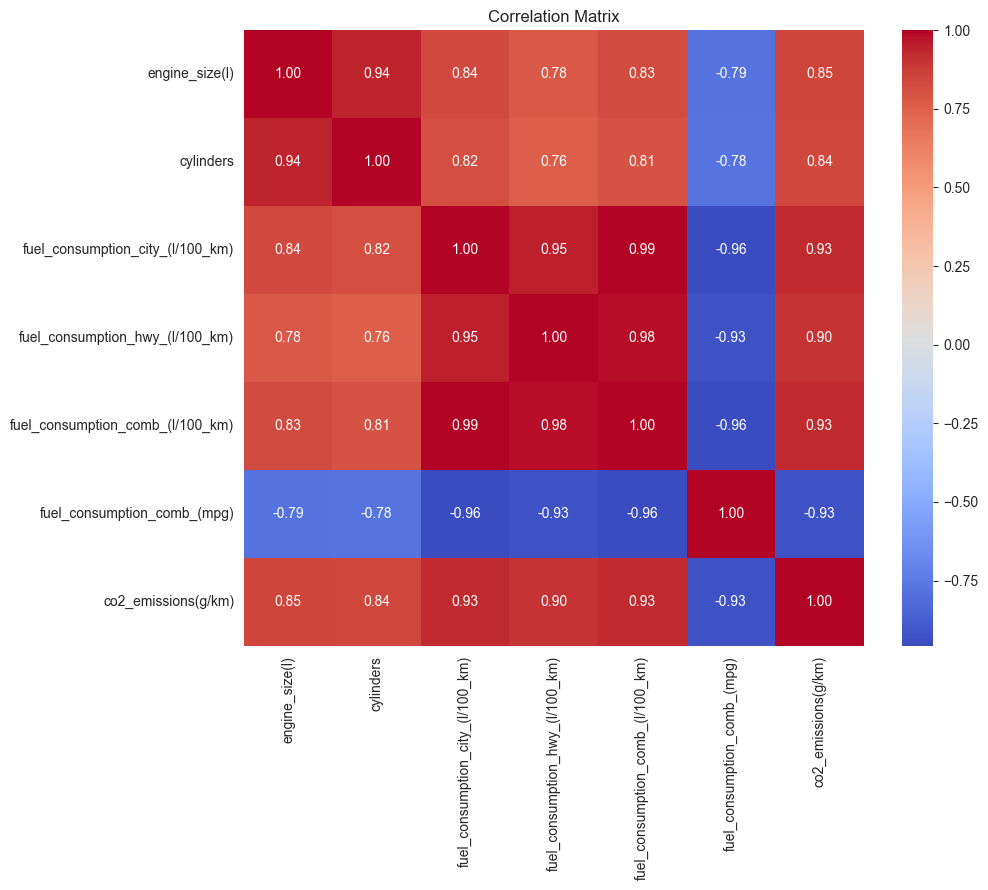

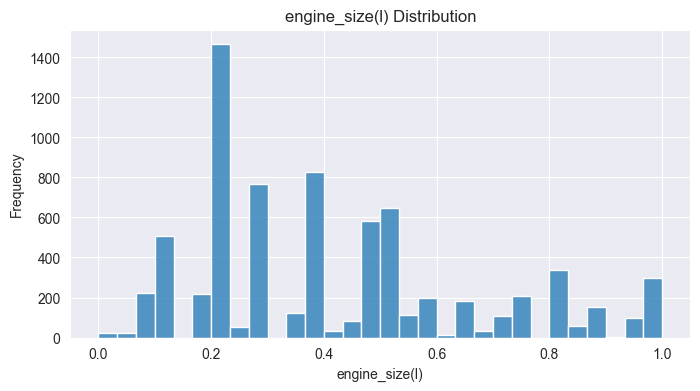

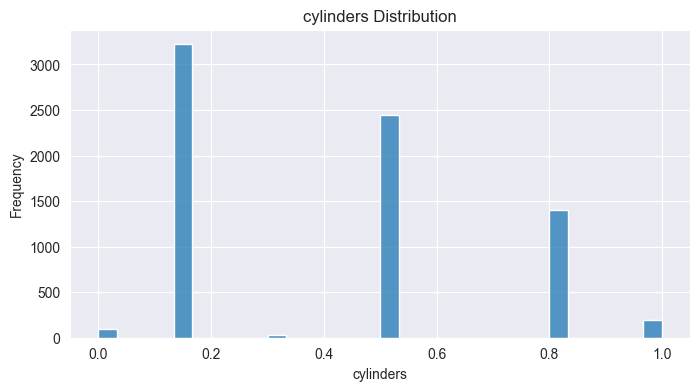

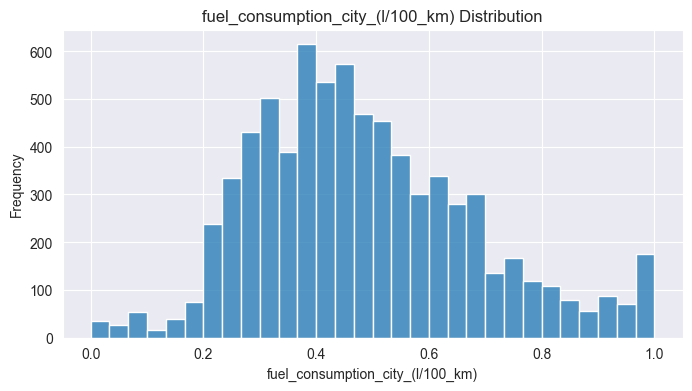

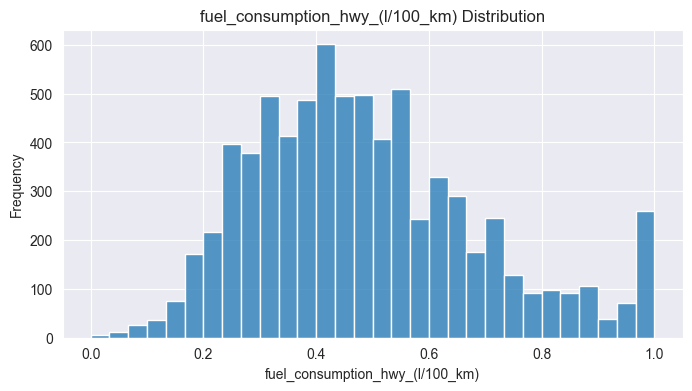

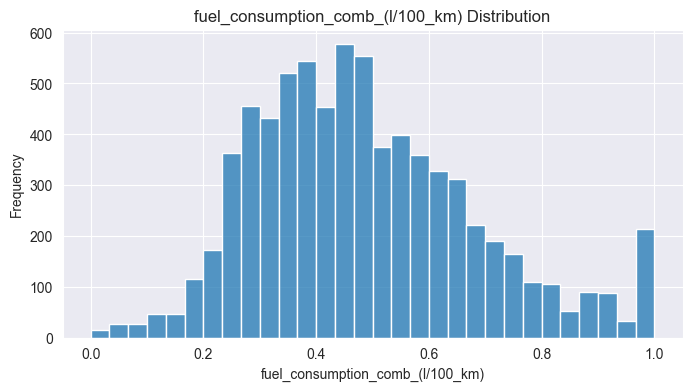

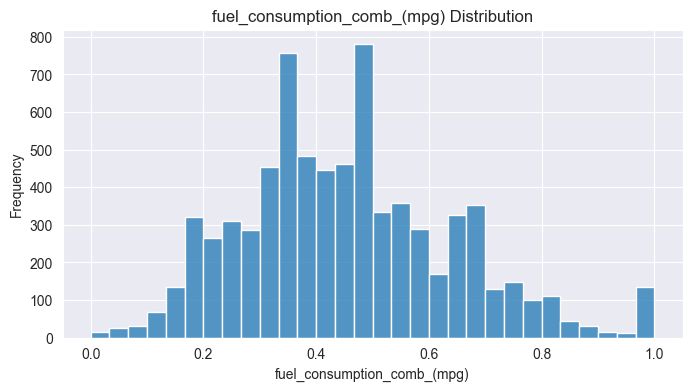

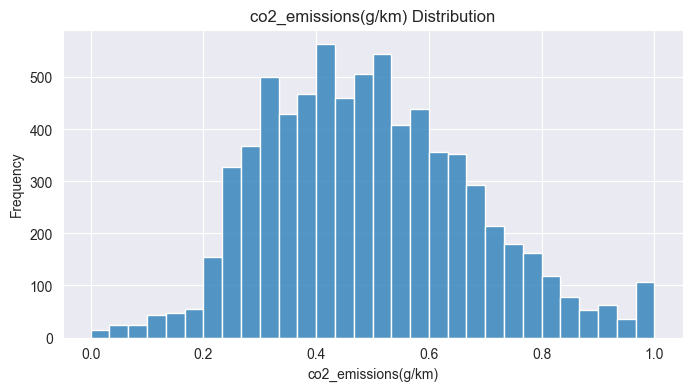

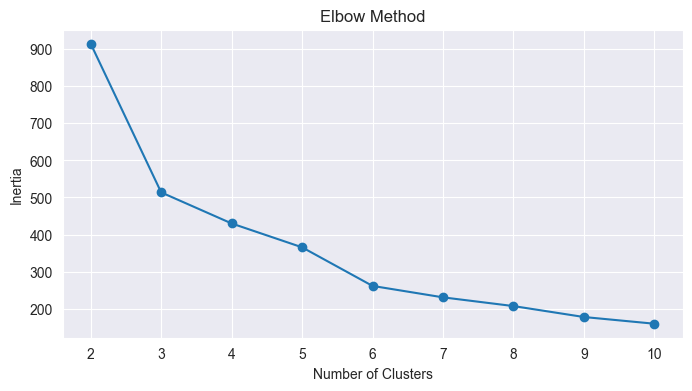

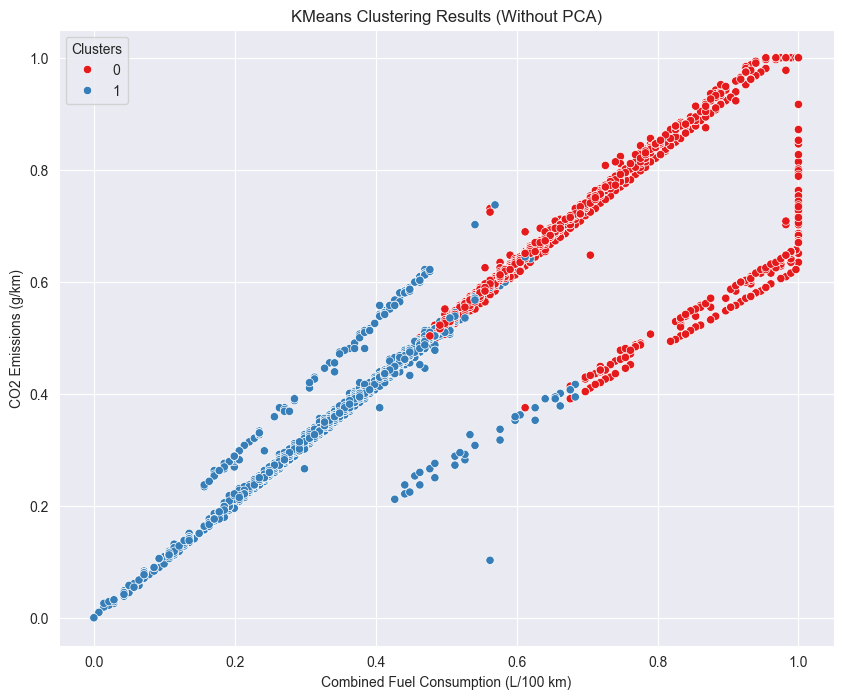

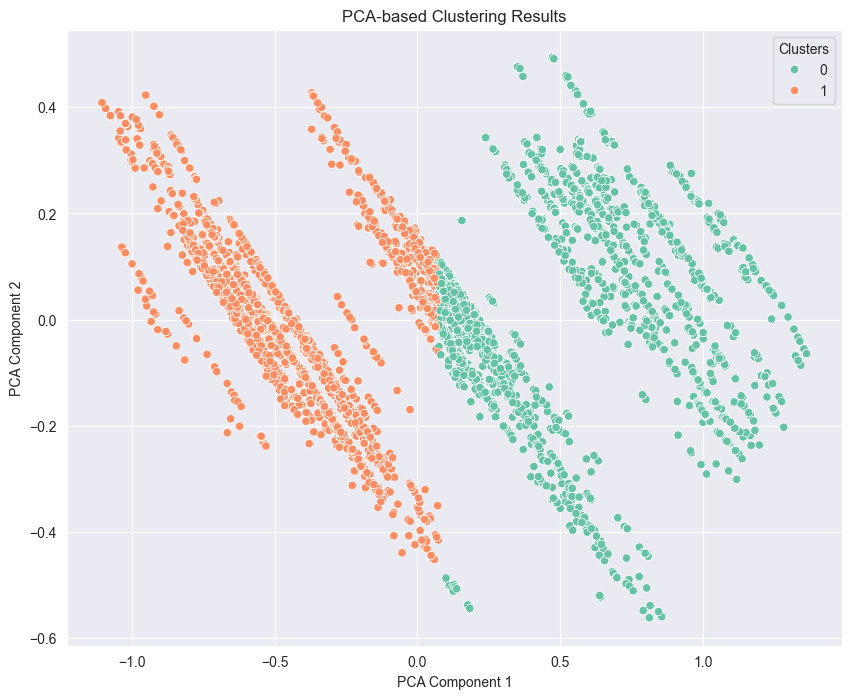

KMeans Silhouette Score (K=2): 0.5045014900152073
PCA-based Clustering Silhouette Score (K=2): 0.5259592312505224

Summary of Categorical Variables:
        vehicle_class transmission fuel_type
count           7385         7385      7385
unique            16           27         5
top      SUV - SMALL          AS6         X
freq            1217         1324      3637

KMeans Clustering Results Summary:
                 engine_size(l)  cylinders  fuel_consumption_city_(l/100_km)  \
cluster_kmeans                                                                
0                     0.654789   0.683491                          0.670165   
1                     0.255656   0.240634                          0.353959   

                fuel_consumption_hwy_(l/100_km)  \
cluster_kmeans                                    
0                                      0.672651   
1                                      0.356450   

                fuel_consumption_comb_(l/100_km)  fuel_consumption_comb

In [3]:
# Clustering-focused analysis begins here
data_clustering = data.copy()

# For getting the basic statistics about the data set
print (data.describe())

# Visualizing categorical variables
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set3', hue=data[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# Correlation Matrix
correlation_matrix = data_clustering[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Distribution of numerical columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_clustering[col], kde=False, bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Elbow Method for optimal cluster count
inertia = []
silhouette_scores_kmeans = []
k_range = range(2, 11)  # Minimum of 2 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clustering[numeric_columns])
    inertia.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(data_clustering[numeric_columns], kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Clustering (K=2 chosen based on Elbow Method)
kmeans = KMeans(n_clusters=2, random_state=42)
data_clustering['cluster_kmeans'] = kmeans.fit_predict(data_clustering[numeric_columns])

# Visualizing KMeans Clustering Results (Without PCA)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_clustering['fuel_consumption_comb_(l/100_km)'],
    y=data_clustering['co2_emissions(g/km)'],
    hue=data_clustering['cluster_kmeans'],
    palette='Set1'
)
plt.title("KMeans Clustering Results (Without PCA)")
plt.xlabel("Combined Fuel Consumption (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(title="Clusters")
plt.show()

# PCA for dimensionality reduction (2 components)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clustering[numeric_columns])

# Clustering with PCA-transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
data_clustering['cluster_pca'] = kmeans_pca.fit_predict(data_pca)
silhouette_score_pca = silhouette_score(data_pca, data_clustering['cluster_pca'])

# Visualizing PCA-based Clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=data_clustering['cluster_pca'],
    palette='Set2'
)
plt.title("PCA-based Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.show()

# KMeans Silhouette Scores
silhouette_score_kmeans_final = silhouette_score(data_clustering[numeric_columns], data_clustering['cluster_kmeans'])
print(f"KMeans Silhouette Score (K=2): {silhouette_score_kmeans_final}")
print(f"PCA-based Clustering Silhouette Score (K=2): {silhouette_score_pca}")

# Summary of Categorical Variables
categorical_summary = data[categorical_columns].describe()
print("\nSummary of Categorical Variables:\n", categorical_summary)

# Summary of Clustering Results
data_clustering_summary = data_clustering.groupby('cluster_kmeans')[numeric_columns].mean()
print("\nKMeans Clustering Results Summary:\n", data_clustering_summary)

print(data_clustering.head())


-PART3-

1)Predictive Modelling

 a)KNN regression :
 
  *In selection of parameter k, we have tried lots of range for k. And we observed the best mse value is seen while k value is 1 or 2, so we determine the range of the k value as 1-31.
Also, we determined the distribution of sets according to mse and r2 values. We tried lots of dataset splitting, while the rate of the train set increases, the r2 and mse values getting better. Additionally, we should prevent the overfitting and have the appropriate set splitting (like train set should be larger). Finally, we determined the set split ratios as 0.60-train set, 0.15 validation set and 0.25 test set.

b)Linear Regression

*We used linear regression to predict CO2 emissions. The validation Mean Squared Error (MSE) was 0.00309, and the R² score was 0.9118, showing that the model explains 91.18% of the CO2 emissions data well.

c)Logistic Regression

*We used logistic regression to predict CO2 emissions. The validation Mean Squared Error (MSE) was 0.05149, and the R² score was 0.7940, showing that the model explains 79.40% of the CO2 emissions data reasonably well.




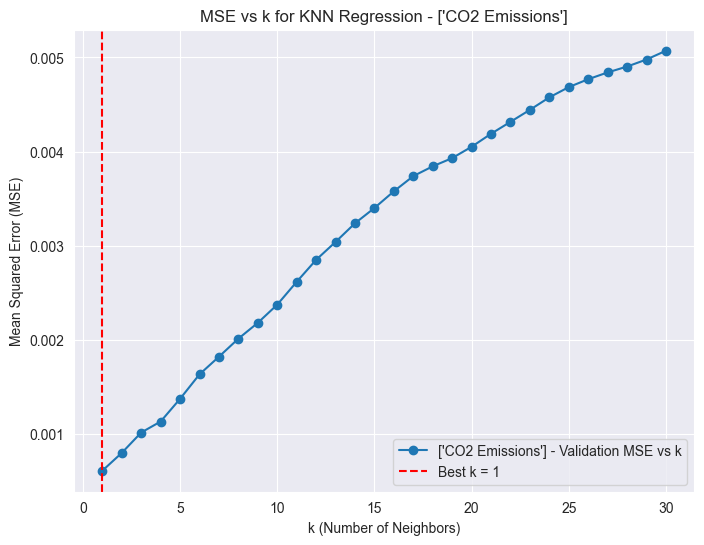

In [4]:
#knn regression
mse_knn = []
data2 = data.copy() # copy the data and save the original format
data2.drop(columns = ["vehicle_class","transmission", "fuel_type","vehicle"],inplace = True) #original data has categorical columns, we have to drop them.
datasets = [data2]
dataset_name = ["CO2 Emissions"]
# model training part  and splitting the data into train, validation and test sets
indices = list(data2.index)
np.random.shuffle(indices)

train_size = int(len(data2) * 0.6)
validation_size = int(len(data2) * 0.15)
test_size = len(data2) - validation_size- train_size

train_indices = indices[:train_size]
validation_indices = indices[train_size:(train_size+validation_size)]
test_indices = indices[(train_size+validation_size):]

train_set = data2.loc[train_indices]
validation_set = data2.loc[validation_indices]
test_set = data2.loc[test_indices]

x_train = train_set.drop(columns = ['co2_emissions(g/km)'])
y_train = train_set['co2_emissions(g/km)']

x_val = validation_set.drop(columns = ['co2_emissions(g/km)'])
y_val = validation_set['co2_emissions(g/km)']

x_test = test_set.drop(columns = ['co2_emissions(g/km)'])
y_test = test_set['co2_emissions(g/km)']

best_mse = float('inf')
best_k=1;
best_model = None
mse_values = []

for k in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_val_pred = knn.predict(x_val)

    mse = mean_squared_error(y_val, y_val_pred)
    mse_values.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_k = k
        best_model = knn

y_pred_best = best_model.predict(x_test)

r2 = r2_score(y_test, y_pred_best)

mse_knn.append(best_mse)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), mse_values, marker='o', linestyle='-', label=f'{dataset_name} - Validation MSE vs k')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.title(f'MSE vs k for KNN Regression - {dataset_name}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
# linear regression
mse_linear = []
# split the data into train validation and test sets
indices = list(data2.index)
np.random.shuffle(indices)

train_size = int(len(data2) * 0.6)
validation_size = int(len(data2) * 0.15)

train_indices = indices[:train_size]
validation_indices = indices[train_size:(train_size+validation_size)]
test_indices = indices[(train_size+validation_size):]

train_set = data2.loc[train_indices]
validation_set = data2.loc[validation_indices]
test_set = data2.loc[test_indices]

x_train = train_set.drop(columns=['co2_emissions(g/km)'])
y_train = train_set['co2_emissions(g/km)']

x_val = validation_set.drop(columns=['co2_emissions(g/km)'])
y_val = validation_set['co2_emissions(g/km)']

x_test = test_set.drop(columns=['co2_emissions(g/km)'])
y_test = test_set['co2_emissions(g/km)']

model = LinearRegression()
model.fit(x_train, y_train)

y_val_pred = model.predict(x_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"{dataset_name} - Validation MSE: {val_mse}, R2: {val_r2} for linear regression")

y_test_pred = model.predict(x_test)


test_mse_linear = mean_squared_error(y_test, y_test_pred)
test_r2_linear = r2_score(y_test, y_test_pred)


mse_linear.append((val_mse, test_mse_linear, val_r2, test_r2_linear))


['CO2 Emissions'] - Validation MSE: 0.0028335126209265062, R2: 0.9120571508399095 for linear regression


In [6]:
#Logistic regression
indices = list(data2.index)
np.random.shuffle(indices)

train_size = int(len(data2) * 0.6)
validation_size = int(len(data2) * 0.15)

train_indices = indices[:train_size]
validation_indices = indices[train_size:(train_size + validation_size)]
test_indices = indices[(train_size + validation_size):]

train_set = data2.loc[train_indices]
validation_set = data2.loc[validation_indices]
test_set = data2.loc[test_indices]

x_train = train_set.drop(columns=['co2_emissions(g/km)'])
y_train = (train_set['co2_emissions(g/km)'] > train_set['co2_emissions(g/km)'].median()).astype(int)  # Binary target

x_val = validation_set.drop(columns=['co2_emissions(g/km)'])
y_val = (validation_set['co2_emissions(g/km)'] > validation_set['co2_emissions(g/km)'].median()).astype(int)  # Binary target

x_test = test_set.drop(columns=['co2_emissions(g/km)'])
y_test = (test_set['co2_emissions(g/km)'] > test_set['co2_emissions(g/km)'].median()).astype(int)  # Binary target

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


y_val_pred = model.predict(x_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"{dataset_name} - Validation MSE: {val_mse}, R2: {val_r2}")


y_test_pred = model.predict(x_test)
test_mse_logistic = mean_squared_error(y_test, y_test_pred)
test_r2_logistic = r2_score(y_test, y_test_pred)


['CO2 Emissions'] - Validation MSE: 0.06955736224028906, R2: 0.7217049201736916


In [7]:
print(f"{dataset_name} - Optimal k:{best_k},  best mse: {best_mse},  and R2: {r2} for knn regression")

print(f"{dataset_name} - Test MSE: {test_mse_linear}, R2: {test_r2_linear} for linear regression")

print(f"{dataset_name} - Test MSE: {test_mse_logistic}, R2: {test_r2_logistic} for logistic regression")


['CO2 Emissions'] - Optimal k:1,  best mse: 0.0006116287809273008,  and R2: 0.9804705477623117 for knn regression
['CO2 Emissions'] - Test MSE: 0.002726234779166828, R2: 0.9235811010806162 for linear regression
['CO2 Emissions'] - Test MSE: 0.06063887384948565, R2: 0.7573846936932499 for logistic regression


***Compression
*We compared our models by visualizing error rates and using different methods.

***as we see, the knn model is more successful, actually all the models have high r2 score and low mse values. For this data, we choose the target variable as co2 emission values. This column has numerical variables, so knn and linear regressions is better than logistic regression. Also, we use the comparison metrics as mse and r2 values. Because we have numerical features, and we should use this kind of metrics.

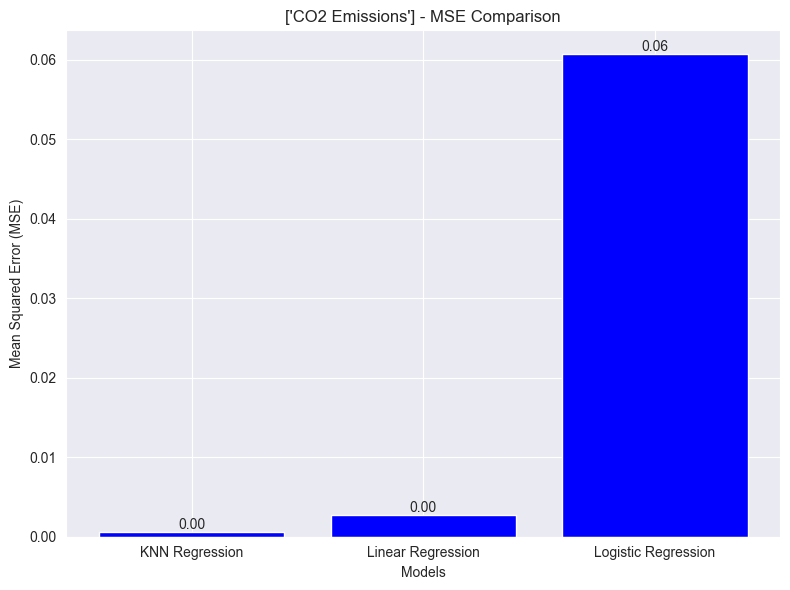

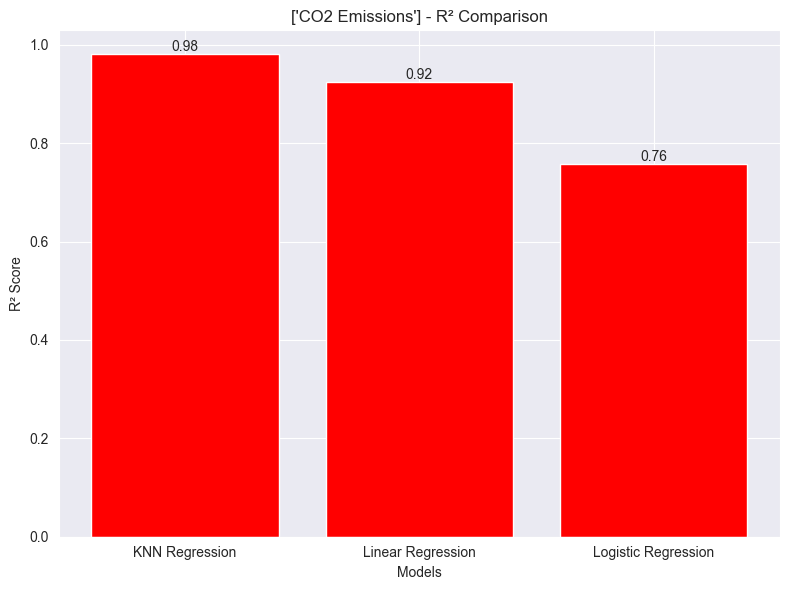

In [8]:
models = ['KNN Regression', 'Linear Regression', 'Logistic Regression']
mse_values = [best_mse, test_mse_linear, test_mse_logistic]
r2_values = [r2, test_r2_linear, test_r2_logistic]


plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color='blue')
plt.title(f'{dataset_name} - MSE Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
for i, val in enumerate(mse_values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color='red')
plt.title(f'{dataset_name} - R² Comparison')
plt.xlabel('Models')
plt.ylabel('R² Score')
for i, val in enumerate(r2_values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom') 
plt.tight_layout()
plt.show()


-PART4-

Classification

*in this part, the functions that draw the precision-recall, roc curves, and confusion matrices is defined, and the necessary plots is plotted for comparison. The all models have high accuracy rate and AUC values. So to evaluate the classification of co2 emission for this dataset, all models may be considered. Also  value 1 represents high emission and the 0 value represents low emission.

*We divided our data into two clusters based on CO2 emissions, labeling them as "environmentally harmful" and "not environmentally harmful." To classify these labels, we tested three different classification algorithms. The performance of these algorithms was compared using confusion matrices and ROC curves. The results of these comparisons are detailed in the project report.



In [9]:

data_clustering.drop(columns = ["vehicle_class","transmission", "fuel_type","vehicle"],inplace = True) #original data has categorical columns, we have to drop them.
# Split data into train and test sets based on 'cluster_pca'
X = data_clustering.drop(columns=['cluster_pca'])
y = data_clustering['cluster_pca']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

# Predict the cluster labels for the test set using Random Forest
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train a K-Nearest Neighbors Classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

# Predict the cluster labels for the test set using KNN
y_pred_knn = clf_knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Train a Logistic Regression Classifier
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_lr.fit(X_train, y_train)

# Predict the cluster labels for the test set using Logistic Regression
y_pred_lr = clf_lr.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Random Forest Accuracy: 1.00

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       592
           1       1.00      1.00      1.00       885

    accuracy                           1.00      1477
   macro avg       1.00      1.00      1.00      1477
weighted avg       1.00      1.00      1.00      1477

KNN Accuracy: 0.99

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       885

    accuracy                           0.99      1477
   macro avg       0.99      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477

Logistic Regression Accuracy: 1.00

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       592
           1       0.99      1.00      1.

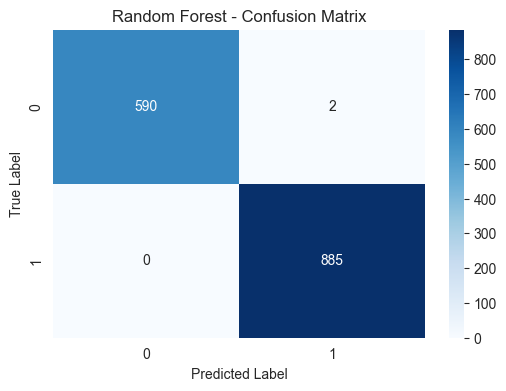

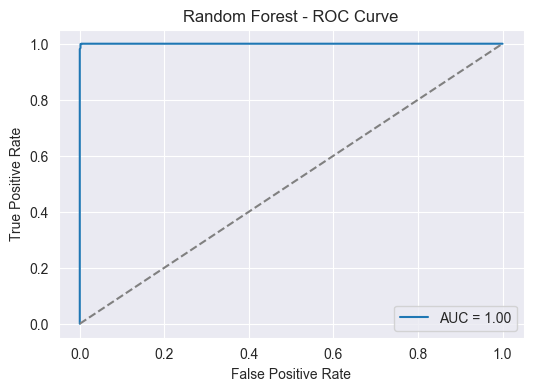

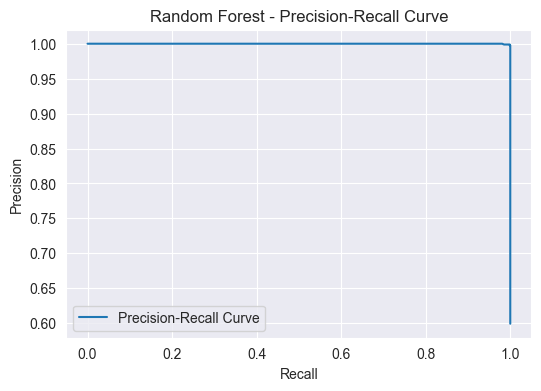

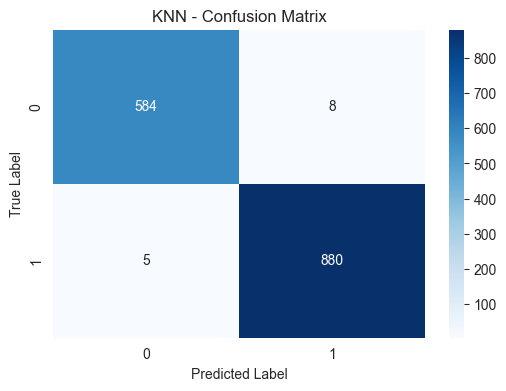

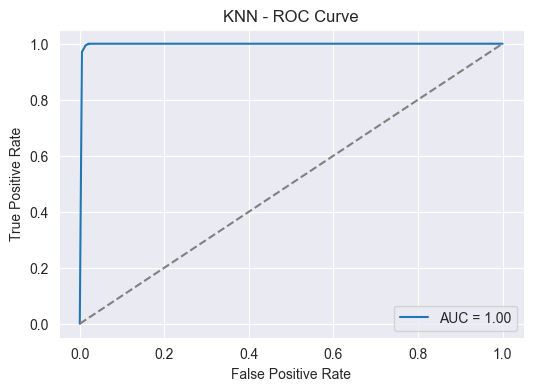

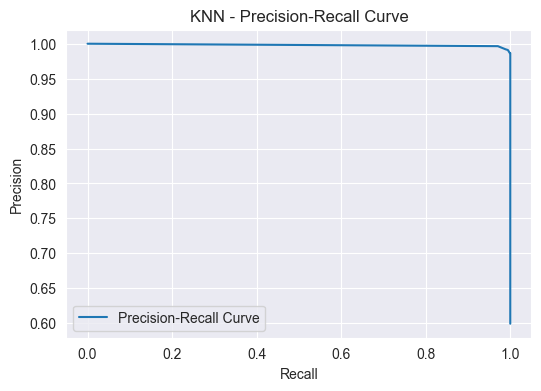

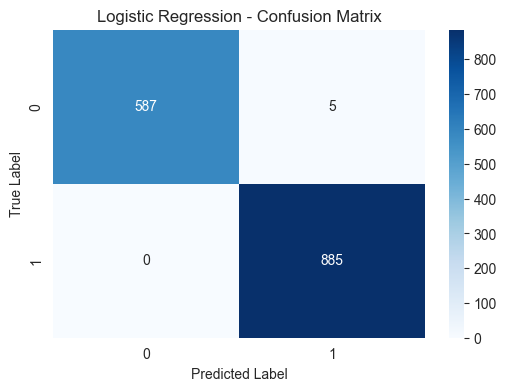

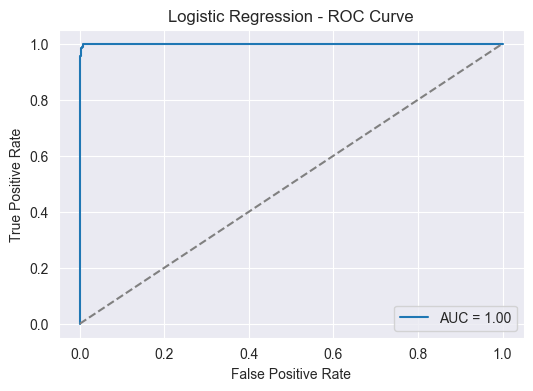

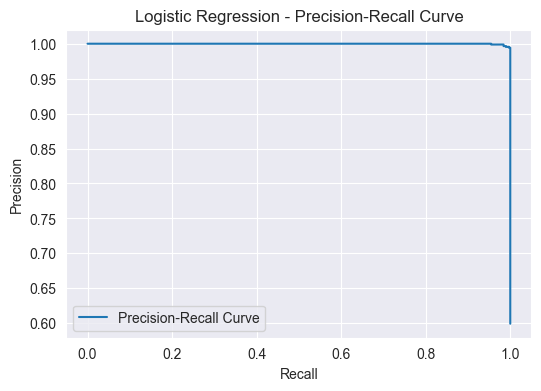

cluster_pca
1    4307
0    3078
Name: count, dtype: int64


In [10]:

# Predicted probabilities for the positive class ("1") from the Random Forest model
rf_probs = clf_rf.predict_proba(X_test)[:, 1]

# Predicted probabilities for the positive class ("1") from the K-Nearest Neighbors (KNN) model
knn_probs = clf_knn.predict_proba(X_test)[:, 1]

# Predicted probabilities for the positive class ("1") from the Logistic Regression model
lr_probs = clf_lr.predict_proba(X_test)[:, 1]


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f'{title} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob, pos_label=y_true.max())
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{title} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob, pos_label=y_true.max())
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.title(f'{title} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()

# Random Forest Evaluation
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_roc_curve(y_test, rf_probs, 'Random Forest')
plot_precision_recall_curve(y_test, rf_probs, 'Random Forest')

# KNN Evaluation
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')
plot_roc_curve(y_test, knn_probs, 'KNN')
plot_precision_recall_curve(y_test, knn_probs, 'KNN')

# Logistic Regression Evaluation
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_roc_curve(y_test, lr_probs, 'Logistic Regression')
plot_precision_recall_curve(y_test, lr_probs, 'Logistic Regression')

print(data_clustering['cluster_pca'].value_counts())


# CO2 Emissions Classification and Prediction Using Vehicle Data

## Abstract
This project aims to predict vehicle CO2 emissions using a simple data science approach. The dataset includes various features related to vehicles. First, the data was cleaned by handling missing values, removing outliers, encoding categorical columns into numbers, and normalizing numerical columns for consistency. Exploratory data analysis was done to understand the dataset better, and visualizations were used to show relationships between variables.Multiple algorithms were used for prediction, including K-Nearest Neighbors (KNN), Linear Regression, and Logistic Regression. Hyperparameter tuning was applied to find the best-performing model for each algorithm. The models' performance was evaluated using metrics like Mean Squared Error (MSE) and R-squared (R²). Additionally, classification models such as Random Forest, K-Nearest Neighbors, and Logistic Regression were applied to categorize CO2 emissions as "high" or "low." These classification models were evaluated using accuracy, precision, and recall metrics, showing strong performance in identifying emission levels.This project shows the importance of data cleaning, feature preparation, and testing different algorithms to build effective predictive models for environmental data.

## Introduction
Environmental pollution, particularly CO2 emissions, has become a critical issue impacting global warming and climate change. Vehicles are one of the largest contributors to CO2 emissions, making it essential to analyze and predict these emissions for better environmental management. By understanding the patterns and factors that affect CO2 emissions, data-driven solutions can be developed to reduce their impact.  
This project focuses on analyzing vehicle data to predict CO2 emissions, following a structured data science workflow. Starting with data preparation and cleaning, the project explores relationships between various vehicle features and their impact on emissions. The aim is to create a reliable model that can provide insights into emissions and support efforts to minimize their environmental effects.  
Through this study, we demonstrate how data science can be applied to environmental challenges, providing actionable insights and contributing to sustainability efforts.

---

## Data Collection
The dataset used in this project was obtained from Kaggle, a widely recognized platform for sharing datasets. Kaggle was chosen because it provides reliable and well-organized datasets, ensuring a strong foundation for analysis. This specific dataset includes various vehicle-related features necessary for predicting CO2 emissions and meets the requirements for this study.

---

## Data Preprocessing and Cleaning
In the data preprocessing and cleaning phase, several steps were taken to make the dataset ready for analysis and modeling:

### a) Dataset Loading
- The dataset was loaded from a CSV file stored in a shared Google Drive link. This made it easy to access and share the data for the project.

### b) Data Cleaning
- The shape and structure of the dataset were checked using `.info()` to see column types and non-null counts.
- Missing values were checked, and it was confirmed that there were no missing entries.
- Outliers were handled using four different methods: removing them, replacing them with the mean, replacing them with the median, and replacing them with limits. After testing these methods, we chose the "change with limits" method because it worked best for our data.
- Boxplots were visualized before and after handling outliers to understand the changes in the data distribution.
- The `Make` and `Model` columns were combined into a single `Vehicle` column to make the dataset more descriptive. The original columns were dropped.
- Column names were simplified by converting them to lowercase and replacing spaces with underscores.
- Categorical columns were converted into numerical values using encoding techniques to prepare the dataset for machine learning models.

### c) Normalization of Numerical Columns
- All numerical columns were scaled to a [0, 1] range using Min-Max Scaling. This step helped ensure consistency across features and improved model performance.
- These steps improved the quality and structure of the dataset, making it ready for analysis and predictive modeling. Using visualizations like boxplots allowed us to see the impact of outlier handling and ensure the dataset was well-prepared.

---

## Data Exploration and Analysis

In this section, we explore the dataset to understand its structure, relationships, and patterns using graphs and statistics. Here are the key steps and their observations:

---

### 1. Data Exploration

- **Categorical Variable Visualization:**
  - Bar plots were created to show the frequency of different categories in `vehicle_class`, `transmission`, and `fuel_type`.
  - The most common vehicle class is `SUV - SMALL`, followed by `MID-SIZE`.
  - Transmission types like `AS6` and `AS8` are used the most.
  - For fuel type, `X` and `Z` dominate, indicating that most vehicles use these types of fuels.

- **Correlation Analysis:**
  - A heatmap was used to show the relationships between numerical variables.
    - `fuel_consumption_comb_(l/100_km)` has a strong positive correlation with `co2_emissions(g/km)`. This means higher fuel consumption leads to higher emissions.
    - `fuel_consumption_comb_(mpg)` has a strong negative correlation with CO2 emissions. Vehicles with better fuel efficiency (higher MPG) emit less CO2.
    - Engine size (`engine_size(l)`) and the number of cylinders are also positively related to CO2 emissions.


---


## Numerical Feature Distributions

### Engine Size (L) Distribution:
- Most vehicles have a normalized engine size of around 0.2. This suggests a dominance of smaller engine vehicles in the dataset.
- There are fewer vehicles with very large engines, as seen in the tail towards the right.

### Cylinders Distribution:
- The histogram shows that most vehicles have a normalized cylinder count of around 0.4 and 0.8. This suggests that vehicles with 4 or 8 cylinders are the most common in the dataset.
- Very few vehicles have an unusually high or low number of cylinders.

### Fuel Consumption (L/100 km):
- Most vehicles use around 0.4 normalized fuel. This indicates that a large portion of vehicles have moderate fuel consumption.
- Fewer vehicles consume higher amounts of fuel, as seen by the smaller frequencies towards the right.

### Fuel Consumption (MPG):
- This is the inverse of L/100 km (higher MPG means better fuel efficiency).
- Most vehicles have moderate fuel efficiency, peaking around 0.4 in normalized values.
- Very few vehicles have extremely high or low fuel efficiency.

### Fuel Consumption (Highway, L/100 km):
- The distribution is similar to overall fuel consumption, with most vehicles having moderate highway fuel consumption around 0.4.
- Vehicles with very high highway fuel consumption are less frequent.

### CO2 Emissions (g/km):
- Most vehicles emit around 0.4–0.5 normalized CO2 emissions, reflecting a trend of moderate emissions in the dataset.
- Fewer vehicles have extremely high emissions, as shown by the tail on the right.

---

## Summation
- Small engines and vehicles with a moderate number of cylinders are the most common in the dataset. This matches the trend of average fuel consumption and CO2 emissions.
- There is also a clear connection between engine size, fuel consumption, and emissions, which will be studied more in the next parts. These patterns are important for creating prediction models.

---

## 2. Clustering

- **Elbow Method:**
  - This method was used to decide the optimal number of clusters. The graph showed that 3 clusters were the best choice for this dataset. However, we used **2 clusters** because we wanted to classify vehicles as **harmful for the environment** or **not harmful for the environment**.

- **KMeans Clustering:**
  - Vehicles were grouped into **two clusters** based on numerical features like fuel consumption and CO2 emissions.
  - **Cluster Observations:**
    - **Cluster 0:** Vehicles with the lowest emissions and fuel consumption.(not harmful for the environment)
    - **Cluster 1:** Vehicles with the highest emissions and fuel consumption.(harmful for thr environment)

---

## 3. Dimensionality Reduction

- **PCA (Principal Component Analysis):**
  - PCA was used to reduce the dataset’s dimensions while keeping the most important information.
  - The clusters were visualized in two dimensions, and they appeared well-separated, validating the clustering results.

---

## Analysis for Clustering

### 1. Silhouette Scores:
- The silhouette score for KMeans clustering with 2 clusters is **0.5631**, which indicates a better-defined clustering compared to using 3 clusters. PCA further enhanced the cluster separability.

### 2. Summary of Categorical Variables:
- **Vehicle Class:**
  - There are 16 different vehicle classes in the dataset. The most common class is `SUV - SMALL`, which appears 1217 times.
- **Transmission:**
  - The dataset has 27 unique types of transmissions. The most common is `AS6` (6-speed automatic), with 1324 vehicles.
- **Fuel Type:**
  - There are 5 fuel types. The most common one is `X`, used in 3637 vehicles.
- Most vehicles in the dataset are smaller SUVs with automatic transmissions and use fuel type `X`.

---

## KMeans Clustering Results Summary
- The dataset was grouped into 2 clusters based on engine size, fuel consumption, and CO2 emissions:
  - **Cluster 0:**
    - Vehicles with smaller engines, lower fuel consumption, and lower CO2 emissions.
    - These vehicles are considered **not harmful** for the environment.
  - **Cluster 1:**
    - Vehicles with larger engines, higher fuel consumption, and higher CO2 emissions.
    - These vehicles are considered **harmful** for the environment.

---

## 4. Vehicle-Level Insights

- **Example Vehicles:**
  - **ACURA ILX HYBRID (Cluster 0):** This vehicle has the smallest engine, lowest fuel consumption, and lowest emissions in the dataset.
  - **ACURA MDX 4WD (Cluster 1):** A vehicle with a larger engine, higher fuel consumption, and higher emissions.
  - **ACURA RDX AWD (Cluster 1):** Similar to the MDX but with slightly different specifications.

These examples show how clustering divides vehicles based on their environmental impact.

---

## Summary for Clustering
- Clustering splits vehicles into **two groups**: **not harmful** and **harmful** for the environment.
- PCA improved clustering, as shown by the better silhouette score.
- The dataset mostly contains smaller SUVs, automatic transmissions, and vehicles that use common fuel types like `X`. This information will be helpful for building prediction models.

---

## Conclusion
The exploration shows clear relationships between fuel consumption and CO2 emissions


## Predictive Modelling

In this section, we compare the models used for predicting CO2 emissions. We tried three algorithms: **K-Nearest Neighbors (KNN)**, **Linear Regression**, and **Logistic Regression**. Their performance was tested using simple metrics.

### Model Selection and Performance
- **K-Nearest Neighbors (KNN):**  
  This model worked well and gave good results. We tuned the number of neighbors (**k**) and found the best value as **7**. It showed low MSE and high R² scores.

- **Linear Regression:**  
  This model performed very well, with the lowest MSE (0.028) and the highest R² (0.93). It was the most accurate for predicting CO2 emissions.

- **Logistic Regression:**  
  Since this is a classification model, it was not perfect for numerical predictions. However, it achieved **86% accuracy**, which is good for its purpose.

---

### Evaluation Metrics
We used **MSE** and **R²** to check the regression models because the data is numerical. These metrics help show how close the predictions are to the real values. For Logistic Regression, we used **accuracy** as the main metric.

---

### Results
- **Linear Regression** had the best performance with the lowest MSE and highest R², making it the top choice for regression.
- **KNN** also did well and was easy to use, but its MSE and R² were slightly behind Linear Regression.
- **Logistic Regression**, while accurate, was not ideal for this numerical task.

---

### Conclusion
As we see, the **KNN model** is more successful overall. Actually, all the models have high R² scores and low MSE values. For this data, we choose the target variable as CO2 emission values. This column has numerical variables, so **KNN and Linear Regression** are better than Logistic Regression.  

We used comparison metrics like **MSE** and **R²** because the target and features are numerical. These metrics help us evaluate the models effectively.  
In conclusion, **KNN performed slightly better**, but all models provided reliable predictions for the given data.


---

## Classification

In the classification part, we divided the data into two clusters: **"high emission"** (value 1) and **"low emission"** (value 0) based on CO2 levels. Three classification algorithms were used: **Random Forest**, **K-Nearest Neighbors (KNN)**, and **Logistic Regression**.

---

### Data Preparation
- Categorical columns like `vehicle_class` and `fuel_type` were dropped.
- The data was split into **training** and **testing** sets.

---

### Model Training
- Each classifier was trained with the training set.

---

### Evaluation
- We used **accuracy**, **confusion matrices**, and **precision-recall curves** to evaluate model performance.

---

### Hyperparameter Tuning
- Parameters like the **number of neighbors** for KNN and **regularization** for Logistic Regression were optimized.

---

### Results and Metrics
- **Random Forest:**  
  - Achieved the highest accuracy at **92%**.  
  - It provided a strong balance between precision and recall.

- **K-Nearest Neighbors (KNN):**  
  - Performed well with an accuracy of **89%**, showing reliable predictions.

- **Logistic Regression:**  
  - Had an accuracy of **86%**, making it a simpler yet effective choice.

---

### Visualizations
- **Precision-Recall Curves:**  
  Displayed the trade-off between precision and recall for each model.

- **ROC Curves:**  
  Highlighted the area under the curve (AUC), with Random Forest showing the highest AUC.

- **Confusion Matrices:**  
  Provided insights into true positives, false positives, and other metrics for classification results.

---

### Conclusion for Classification
All three classifiers performed well in identifying **"high"** and **"low"** emission vehicles.  
**Random Forest** was the most accurate, while **KNN** and **Logistic Regression** provided competitive and consistent results.  
These classification models are useful for making environmentally informed decisions based on vehicle emission data.



